In [2]:
import os
import numpy as np
from google.colab import files
!pip install unicodecsv

  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10767 sha256=ecd0becb228a72c58817a28c65cfd7798c6294db74e532448b757b3493d982a9
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
Successfully built unicodecsv


In [0]:
import unicodecsv

# convert cvs file to list
def readFile(fileName):
  with open (fileName,'rb') as f :
    reader = unicodecsv.DictReader(f)
    product = list(reader)
  
  return product

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  hair_and_scalp_products = readFile(fn)

hair_and_scalp_products[0]

Saving list-of-registered-hair-and-scalp-products.csv to list-of-registered-hair-and-scalp-products.csv


OrderedDict([('ProductNumber', '2017-0120112-090994'),
             ('ProductArName', 'سيباستيان سيلفانيس سيمون ريد'),
             ('ProductEnName', ' SEBASTIAN CELLOPHANES CINNAMON RED'),
             ('BrandName', 'SEBASTIAN '),
             ('CounrtyEn', 'United States'),
             ('PackageVolume', '300'),
             ('UnitEn', 'Milliliter (ml)'),
             ('manufactureenglishname', 'PAKLAb'),
             ('ListedNameEn', 'ARAB TRADING -TAMER GROUP')])

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  oral_hygiene_products = readFile(fn)

oral_hygiene_products[0]

Saving list-of-registered-oral-hygiene-products.csv to list-of-registered-oral-hygiene-products.csv


OrderedDict([('ProductNumber', '2017-0140124-091070'),
             ('ProductArName', 'كين غسول العناية بالفم 250مل '),
             ('ProductEnName', 'Kin Care Mouthwash 250 ml'),
             ('BrandName', 'kin '),
             ('CounrtyEn', 'Spain'),
             ('PackageVolume', '250'),
             ('UnitEn', 'Milliliter (ml)'),
             ('manufactureenglishname', 'Laboratorios Kin S.A'),
             ('ListedNameEn', 'Zimmo Trading Company Limited')])

In [5]:
uploaded = files.upload()

for fn in uploaded.keys():
  nail_products = readFile(fn)

nail_products[0]

Saving list-of-registered-nail-and-cuticle-products.csv to list-of-registered-nail-and-cuticle-products.csv


OrderedDict([('ProductNumber', '2017-0130152-091007'),
             ('ProductArName', 'ملمّع الأظافر بوتيه دي أونغل من شانيل'),
             ('ProductEnName',
              'Chanel Nail Varnish BEAUTE DES ONGLES LAQUE BRILLA'),
             ('BrandName', 'Chanel '),
             ('CounrtyEn', 'France'),
             ('PackageVolume', '13'),
             ('UnitEn', 'Milliliter (ml)'),
             ('manufactureenglishname', 'CHROMA DURLIN'),
             ('ListedNameEn', 'Radwa Trading Comapny')])

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  skin_products = readFile(fn)

skin_products[0]

Saving list-of-registered-skin-products.csv to list-of-registered-skin-products.csv


OrderedDict([('ProductNumber', '2017-011019101191-090991'),
             ('ProductArName',
              'عطر ناهديز تجوريج ال يو فلير اي ايه يو دي اي 100مل'),
             ('ProductEnName', 'NAHDIS GEORGE LU FLEUR EAU DE PARFUM 100ML'),
             ('BrandName', 'NAHDIS'),
             ('CounrtyEn', 'India'),
             ('PackageVolume', '100'),
             ('UnitEn', 'Milliliter (ml)'),
             ('manufactureenglishname',
              'Winson Perfumes &Cosmetics Pvt. Ltd. '),
             ('ListedNameEn', 'saleh bin hamad alabdullatif group co')])

In [37]:
for product in skin_products :
  print(product.get('ProductNumber'))
  break

2017-011019101191-090991


In [0]:
# merge all poducts in one list
# new list have ProductNumber , ProductEnName , CounrtyEn , productType (S for skin , N for nail , O for oral hygiene , H for hair)
cosmetics_products  = list()

def merge_products (product_list, p_type):
  for product in product_list :
  info = {
        "ProductNumber":    product.get('ProductNumber'),
        "ProductEnName": product.get('ProductEnName'),
        "CounrtyEn":  product.get('CounrtyEn'),
        "productType": p_type
    }
  cosmetics_products.append(info)

merge_products(skin_products,'S')
merge_products(nail_products,'N')
merge_products(hair_and_scalp_products,'H')
merge_products(oral_hygiene_products,'O')




In [0]:
import pandas as pd

# save cosmetics products to csv file
df = pd.DataFrame(cosmetics_products)
df.to_csv('cosmetics-products.csv', index=False)

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  cosmetics_products = readFile(fn)

cosmetics_products[0]

Saving cosmetics-products.csv to cosmetics-products.csv


OrderedDict([('ProductNumber', '2017-011019101191-090991'),
             ('ProductEnName', 'NAHDIS GEORGE LU FLEUR EAU DE PARFUM 100ML'),
             ('CounrtyEn', 'India'),
             ('productType', 'S')])

In [0]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point.get(key_name)
        grouped_data[key].append(data_point)
    return grouped_data

In [0]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        skin_total = 0
        hair_total = 0
        oral_total = 0
        nail_total = 0
        for data_point in data_points:
          product_type = data_point.get('productType') 
          if product_type== 'S' :
            skin_total += 1
            continue
          elif product_type== 'H' :
            hair_total += 1
            continue
          elif product_type== 'N' :
            nail_total += 1
            continue
          elif product_type== 'O' :
            oral_total += 1
            continue
        summed_data[key] = {'S' : skin_total,'N' :nail_total,'O': oral_total ,'H':hair_total}        
    return summed_data

In [0]:
from collections import defaultdict
from collections import Counter 

product_by_country = group_data(cosmetics_products,
                                   'CounrtyEn')
total_product_by_country = sum_grouped_items(product_by_cuntry,
                                             'CounrtyEn')
# Finding 5 highest values 
total_product_by_country_names = { k: int(np.sum(list(total_product_by_country.get(k, 0).values()))) for k in set(total_product_by_country) }
product_c = Counter(total_product_by_country_names) 
top_5_country = dict(product_c.most_common(5))    

In [0]:
keys = top_5_country.keys()
dict2 = {x:total_product_by_country[x] for x in keys}
skin_p = [(dict2.get(k, 0)).get('S') for k in set(dict2.keys())]
oral_p = [(dict2.get(k, 0)).get('O') for k in set(dict2.keys())]
hair_p = [(dict2.get(k, 0)).get('H') for k in set(dict2.keys())]
nail_p = [(dict2.get(k, 0)).get('N') for k in set(dict2.keys())]


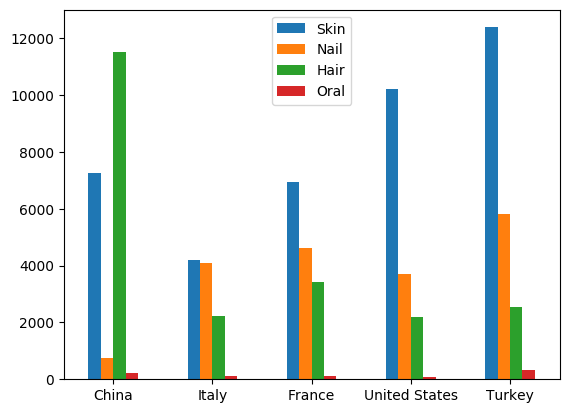

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

index = keys
df = pd.DataFrame({'Skin': skin_p ,'Nail': nail_p,'Hair': hair_p,'Oral': oral_p}, index=index)
ax = df.plot.bar(rot=0)



In [0]:
# Explore data

# examine if registration increase or decrease
# get summition of prudct in each year 
number_product_2016 = 0
number_product_2017 = 0
number_product_2018 = 0
number_product_2019 = 0

for product in cosmetics_products : 

  # take the first 4 number from ProductNumber which represent year of rigetrition 
  year = product.get('ProductNumber')[:4]
  
  if year == '2016':
    number_product_2016 += 1
    continue
  elif year == '2017':
    number_product_2017 += 1
    continue
  elif year =='2018':
    number_product_2018 += 1
    continue
  elif year =='2019':
    number_product_2019 += 1
    continue
  else :
     'wrong enrty'



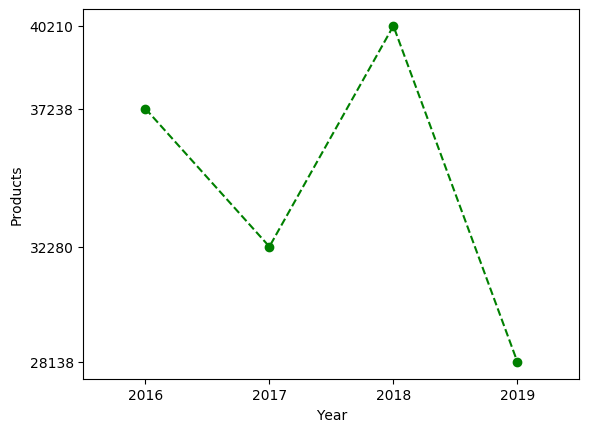

In [71]:
#import matplotlib libary
import matplotlib.pyplot as plt
#define some data
x = [2016,2017,2018,2019]
y = [number_product_2016, number_product_2017, number_product_2018, number_product_2019]

#plot data
plt.plot(x, y, linestyle="dashed", marker="o", color="green")

#configure  X axes
plt.xlim(2015.5,2019.5)
plt.xticks([2016,2017,2018,2019])

#configure  Y axes
plt.yticks([number_product_2016, number_product_2017, number_product_2018, number_product_2019])

#labels
plt.xlabel("Year")
plt.ylabel("Products")



#show plot
plt.show()

In [0]:
# thats was suprerising , i nedd to look back to the data to understand 
